In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

current_path = os.getcwd()
patient_path = os.path.join(current_path, "../pregnancy-data-set/patients.csv")
condition_path = os.path.join(current_path,"../pregnancy-data-set/conditions.csv")

/Users/scarrillo/PycharmProjects/module-validation/notebooks/../pregnancy-data-set/patients.csv


In [137]:
patient_data = pd.read_csv(patient_path, usecols=['Id', 'GENDER'])
age_data = pd.read_csv(patient_path, usecols= ['Id', 'BIRTHDATE'])
conditions_data = pd.read_csv(condition_path, usecols =['START', 'PATIENT', 'CODE', 'DESCRIPTION'])

condition_date = conditions_data[["START"]]
birth_dates = age_data[["BIRTHDATE", "Id"]]

# Calculate Pregnancy DataFrame and copy to clipboard
Run the following cell to copy the 'pregnancies' dataframe to your clipboard (to paste into excel)

In [138]:
pregnancy_codes = [72892002, 47200007, 19169002, 35999006, 79586000, 156073000, 198992004, 398254007]
pregnancies = conditions_data[conditions_data.CODE.isin(pregnancy_codes)]
pregnancies.to_clipboard(excel=True)


## Grab year of pregnancy event and year of birth to get age of patient at time of pregnancy event

In [139]:
pregnancyYears = pregnancies['START'].array # from pregnancies <- conditions.csv
pregnancyDescriptions = pregnancies['DESCRIPTION'].array
birthYears = birth_dates['BIRTHDATE'].array # from patients.csv
pregnancyIds = pregnancies['PATIENT'].to_numpy(dtype=str, copy=True) # from pregnancies df <- conditions.csv
ageIDs = age_data['Id'].to_numpy(dtype=str, copy=True)# from agedata df <- patients.csv


#truncate year from date string and cast to int for age calculation
for i, d in enumerate(pregnancyYears):
    pregnancyYears[i] = int(d[0:4])

for i, j in enumerate(birthYears):
    birthYears[i] = int(j[0:4])


# Create empty array of approximate size we need, to hold the ages.
ages = [0] * len(pregnancies)
p = 0 #index in patients.csv
c = 0 #index in conditions.csv, inner loop, pregnancyIds

# age_data['Id'].to_clipboard(excel=True)

# Acquire index of ageIDs after matching to pregnancyIds, this is the index in birthyears array, or year of birth for pt.
# Then take the integer year of birth and subtract it from the integer year of the pregnancy event
for i in ageIDs:
    for j in pregnancyIds:
         if i == j:
             ages[c] = pregnancyYears[c] - birthYears[p]
             # if ages[c] >= 50:
             #    # Catch any patient over 50 having a pregnancy event, which is not supposed to happen in synthea.
             #    print("[Error getting pregnancy event year!]")
             #    print("INDEX (in Patients.csv): " + str(c))
             #    print("Age:" + str(ages[c]) + ", PID: " + j + ", BIRTHYEAR: " + str(birthYears[p]) + ", PREG YEAR: " + str(pregnancyYears[c]) + ", DESCRIPTION: " + pregnancyDescriptions[c])
             #print(c)
             c += 1

    p += 1

[Error getting pregnancy event year!]
INDEX (in Patients.csv): 178
Age:50, PID: c1f8b0e0-8cc6-b597-0782-af5aeaca8d35, BIRTHYEAR: 1965, PREG YEAR: 2015, DESCRIPTION: Normal pregnancy
[Error getting pregnancy event year!]
INDEX (in Patients.csv): 179
Age:50, PID: c1f8b0e0-8cc6-b597-0782-af5aeaca8d35, BIRTHYEAR: 1965, PREG YEAR: 2015, DESCRIPTION: Miscarriage in first trimester
[Error getting pregnancy event year!]
INDEX (in Patients.csv): 180
Age:50, PID: c1f8b0e0-8cc6-b597-0782-af5aeaca8d35, BIRTHYEAR: 1965, PREG YEAR: 2015, DESCRIPTION: Fetus with unknown complication
[Error getting pregnancy event year!]
INDEX (in Patients.csv): 318
Age:50, PID: 1df68939-bc8f-3828-e5d7-ecac03c92d28, BIRTHYEAR: 1967, PREG YEAR: 2017, DESCRIPTION: Normal pregnancy
[Error getting pregnancy event year!]
INDEX (in Patients.csv): 374
Age:50, PID: 48a093fd-5832-6e0b-aafa-d4d8b2ff9446, BIRTHYEAR: 1929, PREG YEAR: 1979, DESCRIPTION: Normal pregnancy
[Error getting pregnancy event year!]
INDEX (in Patients.csv)

In [96]:
pregnancies['PATIENT'].to_clipboard(excel=True)



# Pregnancy totals by age
Totals by age

In [97]:
# count of age ranges, editing this to closer mimic official NNCHS report age ranges
# https://www.cdc.gov/nchs/data/vsrr/vsrr-8-508.pdf MINUS 10-14 as synthea starts pregnancy events
# at age 14.
pregnancies_15 = 0
pregnancies_19 = 0
pregnancies_24 = 0
pregnancies_29 = 0
pregnancies_34 = 0
pregnancies_39 = 0
pregnancies_44 = 0
pregnancies_50 = 0
erroneous = 0

for a in ages:
    if a <= 15:
        pregnancies_15 += 1
    elif a <= 19:
        pregnancies_19 += 1
    elif a <= 24:
        pregnancies_24 += 1
    elif a <= 29:
        pregnancies_29 += 1
    elif a <= 34:
        pregnancies_34 += 1
    elif a<= 39:
        pregnancies_39 += 1
    elif a<= 44:
        pregnancies_44 += 1
    elif a<= 50:
        pregnancies_50 += 1
    else:
        #these are erroneously calculated ages
        #creating short write up to explain further but for now we are discounting these.
        #either problem lies with the jupyter notebook (likely) or synthea output (not likely)
        erroneous += 1

print("[<= 15]: " + str(pregnancies_15))
print("[<= 19]: " + str(pregnancies_19))
print("[<= 24]: " + str(pregnancies_24))
print("[<= 29]: " + str(pregnancies_29))
print("[<= 34]: " + str(pregnancies_34))
print("[<= 39]: " + str(pregnancies_39))
print("[<= 44]: " + str(pregnancies_44))
print("[<= 50]: " + str(pregnancies_50))
print("[ERROR getting Pregnancy event year]: " + str(erroneous))

print("Pregnancies: ")
print(len(pregnancyIds))
print("Total number of patients (deceased + living): ")
print(len(ageIDs))


[<= 15]: 20
[<= 19]: 111
[<= 24]: 302
[<= 29]: 317
[<= 34]: 316
[<= 39]: 199
[<= 44]: 121
[<= 54]: 213
[ERROR getting Pregnancy event year]: 23
Pregnancies: 
1622
Total number of patients (deceased + living): 
1152


Pregnancies by age bar graph

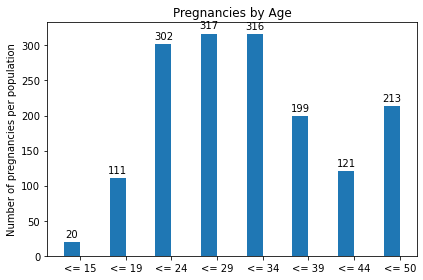

In [98]:
xAxisLabels = ['<= 15', '<= 19', '<= 24', '<= 29', '<= 34', '<= 39', '<= 44', '<= 50']
ages_of_women = [pregnancies_15, pregnancies_19, pregnancies_24, pregnancies_29, pregnancies_34, pregnancies_39,pregnancies_44, pregnancies_50]

x = np.arange(len(xAxisLabels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ages_of_women, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of pregnancies per population')
ax.set_title('Pregnancies by Age')
ax.set_xticks(x)
ax.set_xticklabels(xAxisLabels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
fig.tight_layout()
plt.show()

<ipython-input-99-bed113404a05>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(pregnancy_types, pregnancy_numbers, color='bgrcmyk')


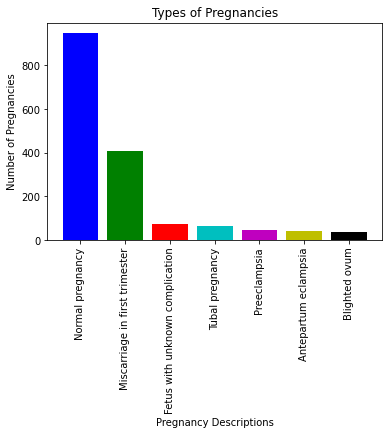

In [99]:
pregnancy_types = pregnancies['DESCRIPTION'].value_counts().keys()
pregnancy_numbers = pregnancies['DESCRIPTION'].value_counts()

plt.title("Types of Pregnancies")
plt.ylabel("Number of Pregnancies")
plt.xlabel("Pregnancy Descriptions")
plt.bar(pregnancy_types, pregnancy_numbers, color='bgrcmyk')
plt.xticks(rotation=90)
plt.show()
